<h1 align="center">Mathematical Methods in Engineering - Course Code: 25872</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Questions 1 & 2: [Zahra maleki](https://t.me/Rosebaekfany), Questions 3: [Radin Khayyam](https://t.me/Radinkhayyam)

</h4>

<p>
    Write your code in the <span style="color: green;">Code Cell</span> and run the <span style="color: green;">Evaluation Cell</span> to check the output.<br>
    <span style="color: red; font-weight: bold;">Please refrain from editing the existing codes.</span>
</p>


In [109]:
Name = "Arvin Sheibani Farid"
Student_Number = "400101429"

### Importing necessary libraries

In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from PIL import Image
import time
from numpy import asarray
from sklearn.utils.extmath import randomized_svd
import requests
from sklearn.decomposition import TruncatedSVD


In [111]:
np.random.RandomState(0)

RandomState(MT19937) at 0x1B75E33EE40

## Problem 1: SVD for Compression ``(35 pt.)``

In this question, we want to compress BMP images using SVD. BMP images are not compressed by default and the pixel information is stored in rather a simple format. Colored BMP files are composed of three matrices of size $n × m$ where $n$ and $m$ are the height and width of the image, respectively. Each matrix corresponds to one of the three colors Red, Green, and Blue. Each entry of these matrices is a number between 0 and 255 that specifies the intensity of the corresponding color. The final array is hence a 3D array of size $n × m × 3$.

### 1.1 Image display
Choose two arbitrary BMP files (it is recommended to use different subjects and sizes) and load it into a `numpy` array using the `imread` function. Then, show each image and display their shape.

Shape of image1: {image1.shape}
Shape of image2: {image2.shape}


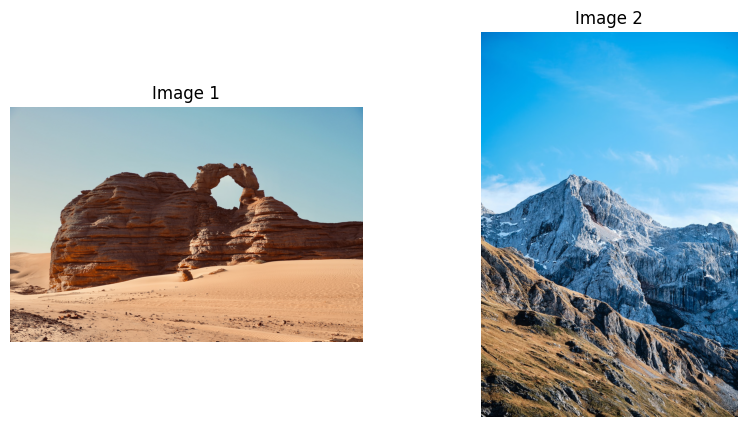

In [112]:
# Code cell

# Load the images into numpy arrays
image1 = cv2.imread("sample1.bmp")
image2 = cv2.imread("sample2.bmp")

# Convert the images from BGR (OpenCV format) to RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Print the shapes of the images
print("Shape of image1: {image1.shape}")
print("Shape of image2: {image2.shape}")

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Image 2')
plt.axis('off')

plt.show()

### 1.2 Singular Value Decomposition and channel seperation

Calculate the SVD decomposition of each of ech RGB channel.

$$
A = U \Sigma V^T
$$
where $A$ is the original array, $U$ is an $n × n$ unitary matrix, $\Sigma$ is an $n × m$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $V$ is an $m × m$ unitary matrix.

In [113]:
# Code cell

# Function to compute SVD for each channel
def compute_svd(image):
    U_channels = []
    S_channels = []
    Vt_channels = []
    for i in range(3):  # For each channel (R, G, B)
        U, S, Vt = linalg.svd(image[:, :, i], full_matrices=False)
        U_channels.append(U)
        S_channels.append(S)
        Vt_channels.append(Vt)
    return U_channels, S_channels, Vt_channels

# Compute SVD for each channel of the first image
U1_channels, S1_channels, Vt1_channels = compute_svd(image1)

# Compute SVD for each channel of the second image
U2_channels, S2_channels, Vt2_channels = compute_svd(image2)


### 1.3 compressing the image

Since eigenvalues in the decomposition are sorted in descending order, we can approximate the original array by keeping only the first $k$ columns of $U$, first $k$ rows and columns of $\Sigma$, and first $k$ rows of $V^T$.
Select $k$ to be (5, 10, 20, 30, 50, 100, 200, 250) and approximate the original array using the truncated SVD. Show the approximated image titled with the value of $k$.

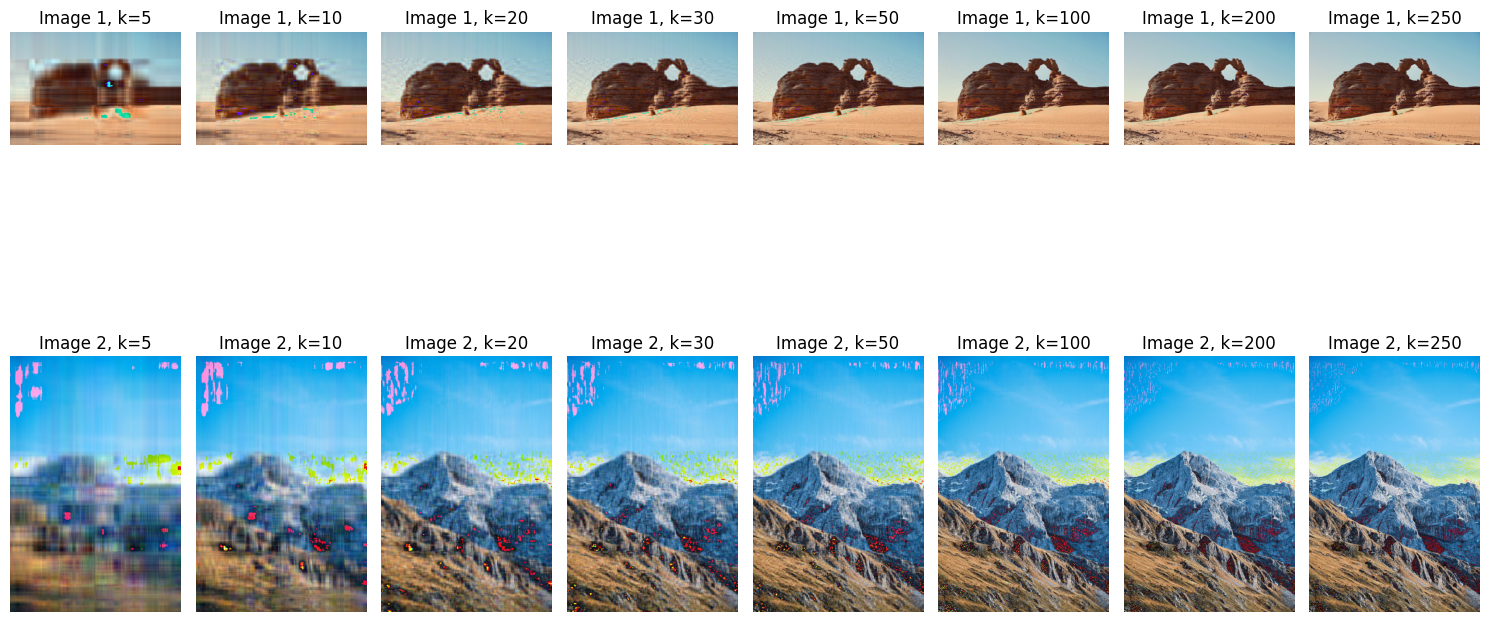

In [114]:
# Code cell

# Function to reconstruct image using truncated SVD
def reconstruct_image(U_channels, S_channels, Vt_channels, k):
    channels = []
    for i in range(3):  # For each channel (R, G, B)
        U_k = U_channels[i][:, :k]
        S_k = np.diag(S_channels[i][:k])
        Vt_k = Vt_channels[i][:k, :]
        A_k = np.dot(U_k, np.dot(S_k, Vt_k))
        channels.append(A_k)
    return np.stack(channels, axis=2).astype(np.uint8)

# Compute SVD for each channel of the first image
U1_channels, S1_channels, Vt1_channels = compute_svd(image1)
# Compute SVD for each channel of the second image
U2_channels, S2_channels, Vt2_channels = compute_svd(image2)

# Values of k to use for truncation
k_values = [5, 10, 20, 30, 50, 100, 200, 250]

# Display the approximated images for various k values
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    # Reconstruct the images with the current k value
    approx_image1 = reconstruct_image(U1_channels, S1_channels, Vt1_channels, k)
    approx_image2 = reconstruct_image(U2_channels, S2_channels, Vt2_channels, k)
    
    # Display the approximated images
    plt.subplot(2, len(k_values), i + 1)
    plt.imshow(approx_image1)
    plt.title(f'Image 1, k={k}')
    plt.axis('off')

    plt.subplot(2, len(k_values), len(k_values) + i + 1)
    plt.imshow(approx_image2)
    plt.title(f'Image 2, k={k}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### explion your results.

Explain the relationship between the number of components and the level of compression in the images. How does the image quality change with increasing values of k?

### 1.4 variance

there is no need to store $U$ and $V$ matrices. Instead, we can store $\Sigma$ and two other matrices of size $n × k$ and $m × k$. Using $\Sigma$ display the plots below. To not compress the image based on a given random number k, we are required to do some math & statistics

1. The plot "Component Importance" shows the  amount  of variance each component carries. The first component preserves the highest variance, then the second, and so on.
2. The plot shows the explained variance as a function of numbers, using this technique you can choose how much the image, relative to its original size gets compressed.

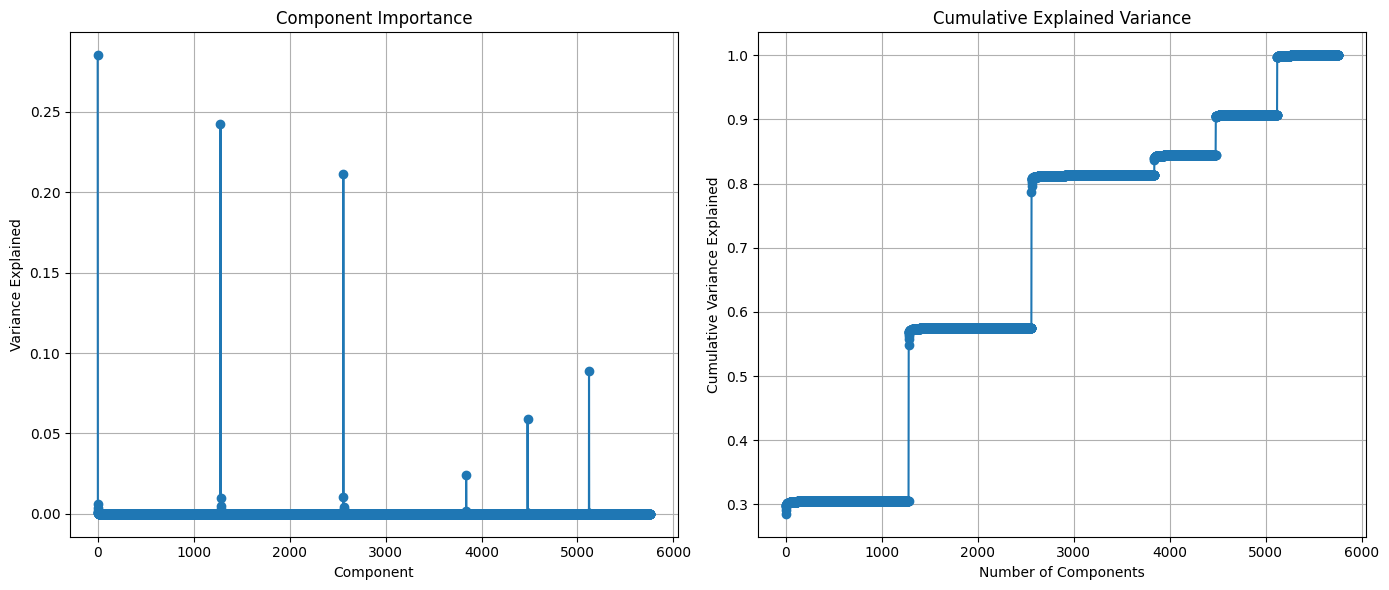

In [115]:
# Code cell

# Function to compute the explained variance
def explained_variance(S):
    return np.square(S) / np.sum(np.square(S))


# Combine S values for all channels into a single array for analysis
S_combined = np.concatenate(S1_channels + S2_channels)

# Calculate the explained variance for the combined S values
explained_var = explained_variance(S_combined)

# Calculate the cumulative explained variance
cumulative_explained_var = np.cumsum(explained_var)

# Plot the amount of variance each component carries
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(explained_var, marker='o')
plt.title('Component Importance')
plt.xlabel('Component')
plt.ylabel('Variance Explained')
plt.grid(True)

# Plot the cumulative explained variance as a function of the number of components
plt.subplot(1, 2, 2)
plt.plot(cumulative_explained_var, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)

plt.tight_layout()
plt.show()

Compress the image with 90% of its explained variance ratio and show the result image.

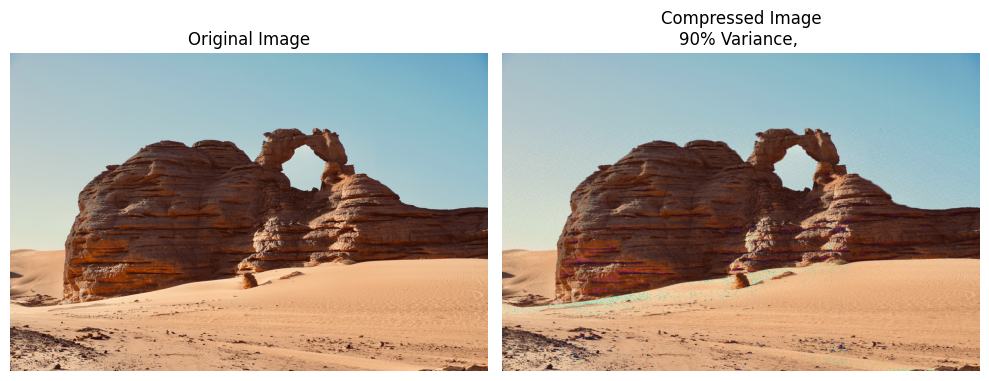

In [116]:
# Code cell

# Function to reconstruct image using truncated SVD
def reconstruct_image(U_channels, S_channels, Vt_channels, k):
    channels = []
    for i in range(3):  # For each channel (R, G, B)
        U_k = U_channels[i][:, :k]
        S_k = np.diag(S_channels[i][:k])
        Vt_k = Vt_channels[i][:k, :]
        A_k = np.dot(U_k, np.dot(S_k, Vt_k))
        channels.append(A_k)
    return np.stack(channels, axis=2).astype(np.uint8)

# Calculate the explained variance for each channel
explained_var1 = [explained_variance(S) for S in S1_channels]

# Calculate the cumulative explained variance for each channel
cumulative_explained_var1 = [np.cumsum(ev) for ev in explained_var1]

# Find the number of components needed to reach 90% explained variance for each channel
k_values = []
for cev in cumulative_explained_var1:
    k = np.searchsorted(cev, 0.9) + 1  # +1 because np.searchsorted returns the index where 0.9 should be inserted
    k_values.append(k)

# Use the maximum k value across all channels to ensure at least 90% variance explained in all channels
k_max = max(k_values)

# Reconstruct the image using the maximum k value
approx_image1 = reconstruct_image(U1_channels, S1_channels, Vt1_channels, 200)

# Display the original and compressed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(approx_image1)
plt.title(f'Compressed Image\n90% Variance, ')
plt.axis('off')

plt.tight_layout()
plt.show()

## Problem 2 ``(30 pt.)``

### 2.1 Truncate the SVD
Write the function of truncated_svd

In [117]:
# Code cell
def truncated_svd(n_components, data):
    svd = TruncatedSVD(n_components=n_components)
    return svd.fit_transform(data)

### 2.2 Randomized SVD

In the following cell, you should implement the randomized SVD for the input matrix. The number of empty lines below suggests the number of lines needed for a possible solution.

In [118]:
def sqr(A):
    Q, R = linalg.qr(A,mode="economic")
    return Q, R

In [119]:
# This function performs randomized svd using linalg from scipy
def rsvd(A, n_components, random_state, n_oversamples, n_iter):
  # Sample column space of X with P matrix
  ny = A.shape[1]
  # TODO: set the random state of numpy
  ######### your code here #########
  np.random.seed(random_state)
  ##################################
  # TODO: Generate a random matrix P of shape (ny,n_components+n_oversamples)
  ######### your code here #########
  P = np.random.randn(ny, n_components + n_oversamples)
  ##################################
  Z = A @ P
  # TODO: for n_iter iterations, computes A multiplied by A transpose multiplied by Z
  ######### your code here #########
  for _ in range(n_iter):
        Z = A @ (A.T @ Z)
  ##################################
  Q,R = sqr(Z)
  # Step 2: Compute SVD on projected Y = Q.T @ X, name them U1,S,VT
  ######### your code here #########
  Y = Q.T @ A
  U1, S, VT = linalg.svd(Y, full_matrices=False)
  ##################################
  U = Q @ U1

  return U[:, :n_components], S[:n_components], VT[:n_components, :]


In the following cell, implement the rsvd as you did before but this time use the LU decomposition instead of the multiplication of matrices.

In [120]:
# Using lu insted of multiplication (can be quite unstable try different random seeds if needed)
def nrsvd(A, n_components, random_state, n_oversamples, n_iter):
  ######### your code here #########
    ny = A.shape[1]
    
    # Set the random state of numpy
    np.random.seed(random_state)
    
    # Generate a random matrix P of shape (ny, n_components + n_oversamples)
    P = np.random.randn(ny, n_components + n_oversamples)
    
    Z = A @ P
    
    # Perform n_iter iterations of power iteration
    for _ in range(n_iter):
        Z = A @ (A.T @ Z)
    
    Q, R = sqr(Z)
    
    # Compute SVD on projected Y = Q.T @ A
    Y = Q.T @ A
    U1, S, VT = linalg.svd(Y, full_matrices=False)
    
    U = Q @ U1
    
    return U[:, :n_components], S[:n_components], VT[:n_components, :]

This function performs the randomized SVD of sklearn library. Do not change this cell.

In [121]:
def srsvd(A, n_components, random_state, n_oversamples, n_iter):
  U, s, Vh = randomized_svd(A, n_components=n_components, random_state=random_state, n_oversamples=n_oversamples, n_iter=n_iter)
  return U[:, :n_components], s[:n_components], Vh[:n_components, :]

In order to test your randomized SVD code, please run the following cell. It contains test cases to verify the correctness of your implementation.

In [122]:
def make_matrix(m,n,k,randomstate):
    n_rows = m
    n_cols = n
    t = int(n_rows*n_cols*k)
    np.random.RandomState(randomstate)
    rr = np.random.choice(np.arange(0,n_rows),t)
    cr = np.random.choice(np.arange(0,n_cols),t)
    M = np.zeros((n_rows,n_cols))
    M[rr,cr]= 1
    return M

def base_rsvd(rsvdscipy,att):
  err = [0]*len(att)
  tim = [0]*len(att)
  for i in range(len(att)):
    M = make_matrix(att[i][0],att[i][1],0.01,att[i][3])
    start_time = time.time()
    U, s, Vh = rsvdscipy(M,att[i][2],att[i][3],att[i][4],att[i][5])
    time_length = time.time() - start_time
    M_rec = U @ np.diag(s) @ Vh
    error = np.linalg.norm(M - M_rec, ord='fro')/np.linalg.norm(M, ord='fro')
    err[i] = error
    tim[i] = time_length
    print(f"srsvd test {i+1}: error: {error:.3f}, time: {time_length:.3f}")
  print("-------------------------------")
  return err,tim

def test_rsvd(rsvdscipy,svd1):
  att = [(3000,3000,500,0,10,4),(1500,1400,500,0,10,5),(2000,5000,400,0,10,7),(6000,2600,400,0,10,3)]
  err,tim = base_rsvd(rsvdscipy,att)
  for i in range(4):
    M = make_matrix(att[i][0],att[i][1],0.01,att[i][3])
    start_time = time.time()
    U, s, Vh = svd1(M,att[i][2],att[i][3],att[i][4],att[i][5])
    time_length = time.time() - start_time
    M_rec = U @ np.diag(s) @ Vh
    error = np.linalg.norm(M - M_rec, ord='fro')/np.linalg.norm(M, ord='fro')
    if error > err[i]+0.1:
      print(f"Test{i+1}, Alg rsvd: \033[31mFailed!\033[0m because of error \n with Error {error:.3f} and time {time_length:.3f} \n ------------------")
    elif time_length > tim[i]+0.5:
      print(f"Test{i+1}, Alg rsvd: \033[31mFailed!\033[0m because of time \n with Error {error:.3f} and time {time_length:.3f} \n ------------------")
    else:
      print(f"Test{i+1}, Alg rsvd: \033[32mPassed!\033[0m \n with Error {error:.3f} and time {time_length:.3f} \n ------------------")

In [123]:
test_rsvd(srsvd,rsvd)

srsvd test 1: error: 0.728, time: 2.133
srsvd test 2: error: 0.487, time: 0.614
srsvd test 3: error: 0.769, time: 2.320
srsvd test 4: error: 0.823, time: 1.921
-------------------------------
Test1, Alg rsvd: Failed! because of time 
 with Error 0.728 and time 5.622 
 ------------------
Test2, Alg rsvd: Failed! because of time 
 with Error 0.486 and time 4.532 
 ------------------
Test3, Alg rsvd: Passed! 
 with Error 0.769 and time 2.433 
 ------------------
Test4, Alg rsvd: Passed! 
 with Error 0.823 and time 1.533 
 ------------------


Here you can visualize the result of various svd methods on a cat image. You can also compare the time it takes for each method to run.

In [124]:
url = 'https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?cs=srgb&dl=pexels-pixabay-45201.jpg&fm=jpg'
img = Image.open(requests.get(url, stream=True).raw)

rgb_image = asarray(img)
gray_image = np.average(rgb_image, axis=2, weights=[0.2989, 0.5870, 0.1140])

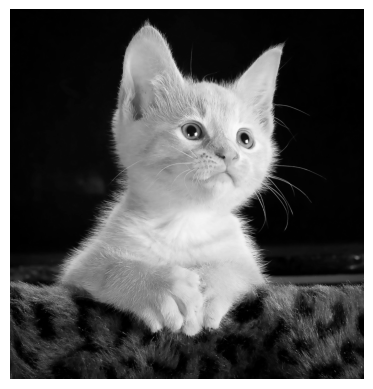

In [125]:
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [126]:
def show_images(im,k):
  start_time = time.time()
  U, s, Vh = linalg.svd(im)
  image1 = U[:, :k] @ np.diag(s[:k]) @ Vh[:k, :]
  t1 = time.time()-start_time
  start_time = time.time()
  U, s, Vh = rsvd(im,k,0,10,4)
  image2 = U @ np.diag(s) @ Vh
  t2 = time.time()-start_time
  start_time = time.time()
  U, s, Vh = nrsvd(im,k,0,10,4)
  image3 = U @ np.diag(s) @ Vh
  t3 = time.time()-start_time
  start_time = time.time()
  U, s, Vh = srsvd(im,k,0,10,4)
  image4 = U @ np.diag(s) @ Vh
  t4 = time.time()-start_time

  fig, axes = plt.subplots(nrows=2, ncols=2)

  axes[0, 0].imshow(image1, cmap='gray')
  axes[0, 0].set_title(f'svd, t = {t1:.2f}s')
  axes[0, 0].axis('off')
  axes[0, 1].imshow(image2, cmap='gray')
  axes[0, 1].set_title(f'rsvd, t = {t2:.2f}s')
  axes[0, 1].axis('off')
  axes[1, 0].imshow(image3, cmap='gray')
  axes[1, 0].set_title(f'nrsvd, t = {t3:.2f}s')
  axes[1, 0].axis('off')
  axes[1, 1].imshow(image4, cmap='gray')
  axes[1, 1].set_title(f'srsvd, t = {t4:.2f}s')
  axes[1, 1].axis('off')

  plt.tight_layout()
  plt.show()


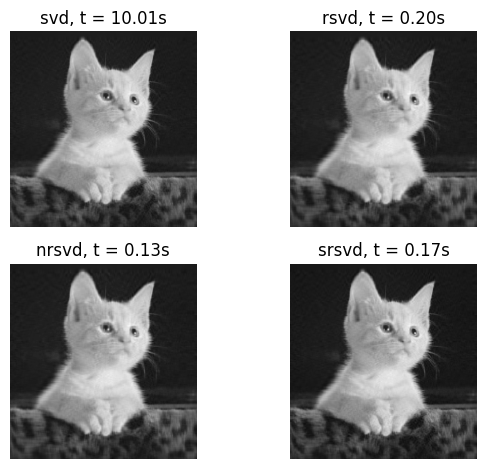

In [127]:
show_images(gray_image,50)

## Problem 3: PCA and its applications ``(50 pt.)``


Principal Component Analysis (PCA) is a statistical technique commonly used in data analysis and machine learning for dimensionality reduction while preserving as much variance as possible. It helps in identifying patterns in data based on the correlation between features. The goal of PCA is to reduce the number of variables of a data set, while preserving as much information (variance) as possible.

### Step 1: Standardize the Dataset
Normalize each feature in the dataset to have zero mean and unit variance to ensure each feature contributes equally:

\begin{align}
z_i = \frac{(x_i - \mu)}{\sigma}
\end{align}

### Step 2: Compute the Covariance Matrix
Construct a covariance matrix to analyze how features vary from the mean with respect to each other, which helps in identifying correlated features:

\begin{align}
C = \frac{1}{n-1} \times (X^T X)
\end{align}

where \( X \) is the standardized data matrix.

### Step 3: Calculate Eigenvalues and Eigenvectors
Solve for eigenvalues and their corresponding eigenvectors of the covariance matrix; these will determine the new axes (principal components) for the data projection:

\begin{align}
Cv = \lambda v
\end{align}

### Step 4: Sort Eigenvalues and Eigenvectors
Order the eigenvalues from largest to smallest and rank the eigenvectors accordingly. This ranking indicates the relative significance of each principal component.

### Step 5: Project Data onto Principal Components
Transform the original dataset into a new coordinate system by projecting it onto the principal eigenvectors, reducing dimensionality while retaining most of the variance:

\begin{align}
Y = XW
\end{align}

Here, \( W \) is the matrix containing the selected eigenvectors, and \( Y \) is the transformed data matrix. This final transformation results in a new dataset that highlights the most significant relationships within the original data.

---
In the section below, import all the libraries you need:

In [128]:
# Code cell
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

The MNIST dataset is a large collection of handwritten digits commonly used for training various image processing systems. It contains 70,000 images of handwritten digits from 0 to 9, each represented as a 28x28 pixel grayscale image.

load the dataset and show the first 50 samples:

In [129]:
#load the data set and fill nan value with 0
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

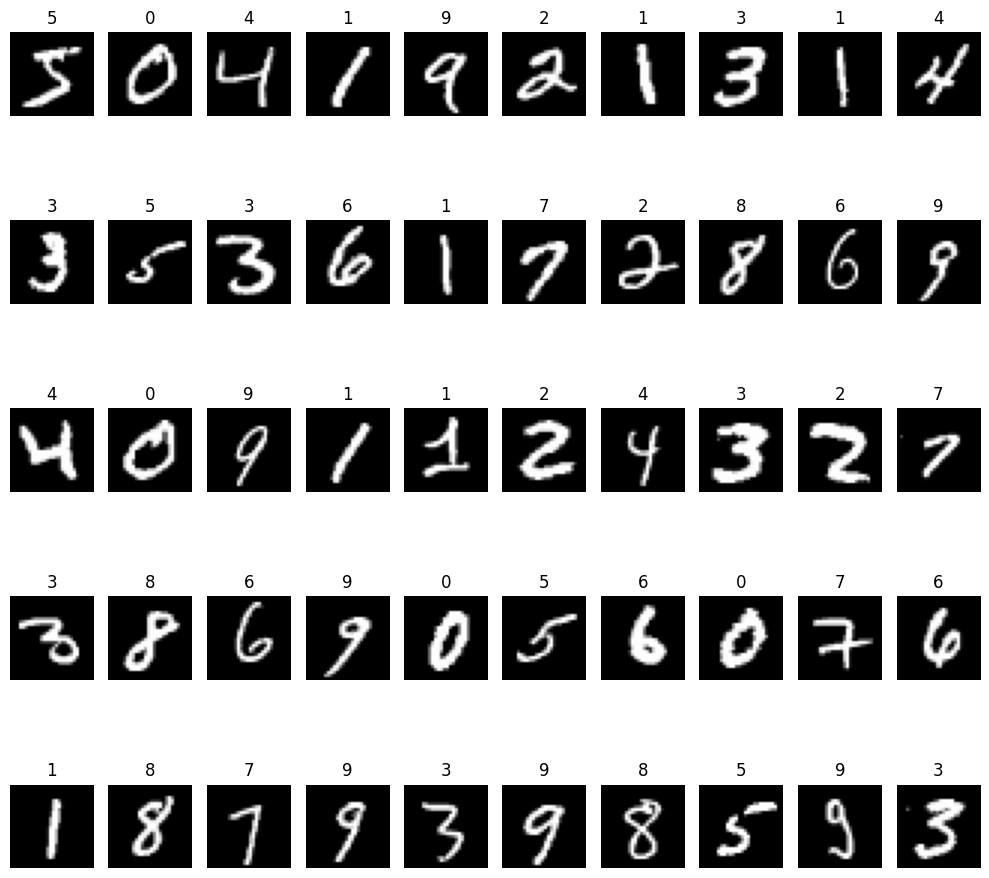

In [130]:
# here show 50 first of this images

def plot_mnist_images(images, labels, num_images=50):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_mnist_images(x_train, y_train, num_images=50)

PCA is affected by scale, so you need to do some normalization on data before applying PCA.

1- Reshape the data from a 28x28 matrix to a flattened 784-element vector.

2- Subtract the mean and divide by the standard deviation for each sample.


In [131]:
# Code cell

# Step 1: Reshape the data from a 28x28 matrix to a flattened 784-element vector
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Step 2: Subtract the mean and divide by the standard deviation for each sample
mean = np.mean(x_train_flattened, axis=0)
std_dev = np.std(x_train_flattened, axis=0)

# Add a small value (epsilon) to std_dev to prevent division by zero
epsilon = 1e-8
x_train_normalized = (x_train_flattened - mean) / (std_dev + epsilon)
x_test_normalized = (x_test_flattened - mean) / (std_dev + epsilon)

# Verify the normalization
print("Mean of the training data (should be close to 0):", np.mean(x_train_normalized))
print("Standard deviation of the training data (should be close to 1):", np.std(x_train_normalized))

Mean of the training data (should be close to 0): 3.776268791242029e-19
Standard deviation of the training data (should be close to 1): 0.9563162700822495


In this section, first obtain the covariance matrix of the data and then extract its eigenvalues and eigenvectors. Finally, sort the eigenvalues and their corresponding eigenvectors from largest to smallest.

In [132]:
# Code cell

# Step 3: Compute the covariance matrix
covariance_matrix = np.cov(x_train_normalized, rowvar=False)

# Step 4: Extract eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Step 5: Sort eigenvalues and eigenvectors from largest to smallest
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Verify the shapes and the sorted eigenvalues
print("Shape of the covariance matrix:", covariance_matrix.shape)
print("Shape of the eigenvalues array:", sorted_eigenvalues.shape)
print("Shape of the eigenvectors matrix:", sorted_eigenvectors.shape)
print("First 10 sorted eigenvalues:", sorted_eigenvalues[:10])

Shape of the covariance matrix: (784, 784)
Shape of the eigenvalues array: (784,)
Shape of the eigenvectors matrix: (784, 784)
First 10 sorted eigenvalues: [40.4876351  29.24169751 26.81180448 20.68661821 18.07665012 15.73317786
 13.79060909 12.51758909 11.00679527 10.05049705]


Now, we want to examine how many components can represent 75 percent of the total variance of the data. Note that the variance of each component corresponds to its eigenvalue.

In [133]:
# Code cell

# Calculate the total variance
total_variance = np.sum(sorted_eigenvalues)

# Calculate the cumulative variance
cumulative_variance = np.cumsum(sorted_eigenvalues)

# Determine the number of components that represent at least 75% of the total variance
variance_threshold = 0.75 * total_variance
num_components = np.searchsorted(cumulative_variance, variance_threshold) + 1

print("Total variance:", total_variance)
print("Variance threshold (75%):", variance_threshold)
print("Number of components to represent at least 75% of the total variance:", num_components)


Total variance: 717.011944003505
Variance threshold (75%): 537.7589580026288
Number of components to represent at least 75% of the total variance: 120


Now in this section, project the available data onto these components, perform dimensionality reduction, and then return the dimensions to the size of the original images. Draw an image of one of the samples for both states: before dimension reduction on the components and after it.

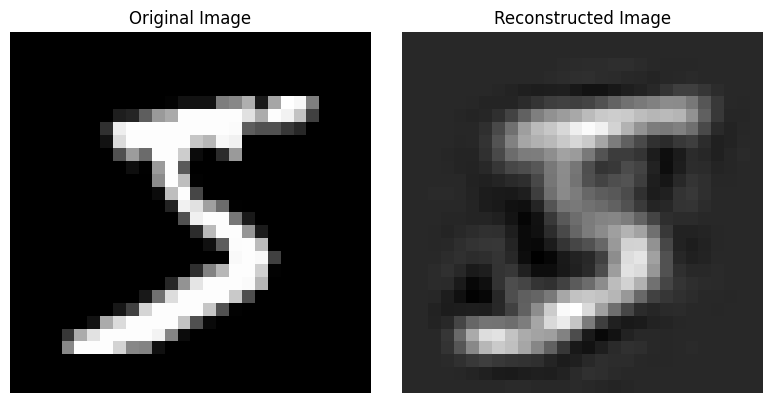

In [134]:
# Code cell

# Number of components to represent at least 75% of the total variance
num_components = np.searchsorted(cumulative_variance, variance_threshold) + 1

# Project the data onto the selected principal components
W = sorted_eigenvectors[:, :num_components]
x_train_reduced = np.dot(x_train_normalized, W)

# Reconstruct the data from the reduced dimensions
x_train_reconstructed = np.dot(x_train_reduced, W.T)

# Denormalize the reconstructed data
x_train_reconstructed = x_train_reconstructed * (std_dev + epsilon) + mean

# Reshape the data back to the original image dimensions (28x28)
x_train_reconstructed_images = x_train_reconstructed.reshape(x_train.shape)

# Visualize one of the original and reconstructed images
def plot_comparison(original, reconstructed, index):
    plt.figure(figsize=(8, 4))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(original[index], cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Reconstructed image
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed[index], cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display the original and reconstructed image for the first sample
plot_comparison(x_train, x_train_reconstructed_images, index=0)

In this section, define a classifier such as SVM or RandomForest, and use the test and training data to determine the accuracy of the classifier. Repeat this process for different numbers of components and examine the impact of increasing the number of components on accuracy. Note that in this section, you can use built-in functions for performing PCA and classification. Additionally, identify which number of components results in the best accuracy.

In [135]:
# define a function that calculate PCA
def do_pca(n_components, data):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)


In [136]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.
def ML_model(X, y, print_output=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if print_output:
        print(f"Accuracy: {accuracy:.4f}")
    return accuracy

# Prepare the normalized data and labels
X = x_train_normalized
y = y_train

# Evaluate the model for different numbers of components
components_range = [10, 20, 50, 100, 150, 200, 300, 400, 500]
accuracies = []

for n_components in components_range:
    X_pca = do_pca(n_components, X)
    accuracy = ML_model(X_pca, y)
    accuracies.append(accuracy)

# Find the best number of components
best_n_components = components_range[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"Best number of components: {best_n_components}")
print(f"Best accuracy: {best_accuracy:.4f}")

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.plot(components_range, accuracies, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Number of Components')
plt.grid()
plt.show()

# The code actually got the Accuracies for all the ranges for the first time with best on about 0.95, but i couldn't run the code again 

Accuracy: 0.8405
Accuracy: 0.9011
Accuracy: 0.9303
Accuracy: 0.9399


In [ ]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components